_**PROBLEM 2: Non-Symmetric Random Walk**_

In [1]:
from __future__ import (absolute_import, division, 
                        unicode_literals, print_function)
import numpy as np
import numpy.random as rand
from matplotlib import pyplot as plt
import math
%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days
Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 30 days


_Consider a random walk which is not necessarily symmetric, where the
probability of a head is given by p  	$\epsilon $(0;1) whereas the probability of a tail is q = 1
What is the expectation of the random walk for p= 0.75?_

The question suggests, this random walk is not necessarily martingale. If it was a martingale, the answer would be $n(2p-1)$

**From the definition of expectation value: 
Suppose random variable X can take value $x_1$ with probability p1, value $x_2$ with probability $p_2$, and so on, up to value $x_k$ with probability $p_k$. Then the expectation of this random variable X is defined as:**
$E[X] = x_1p_1 + x_2p_2 + ... + x_kp_k$ 

In other words, one step increment of the random walk is $E[X_i] = p × 1 + (1 − p) × (−1) = 2p − 1$

Let outcome head = 1 and tail = -1 and n be the number of heads over a total of N steps.   
$E[X] = (1)pn + (-1)(1-p)(N-n) = (2p-1)n+(1-p)N$ where n is the number of heads out of N steps. For p=0.75, $E[X_k|X_0] = 0.5n + (0.25)N$ 

If the process was defined as a _martingale_, this expectation would be $N(2p-1) = (0.5)N$ where n is again the number of heads.

In [2]:
def non_sym_walk(step_count, p=0.3):
    """Returns the result for one of the possible paths
    """
    walk_path = np.zeros(step_count)
    # Draw samples from a uniform distribution.
    uniform_arr = rand.uniform(size=step_count) # default is between 0 and 1
    # X_0 = 0
    uniform_arr[0] = 0
    for index, x in np.ndenumerate(uniform_arr):
        if x <= p: # since non-symmetric
            walk_path[index[0]] = walk_path[index[0]-1] + 1
        else:
            walk_path[index[0]] = walk_path[index[0]-1] - 1
    return walk_path

/Users/arkilic/anaconda/envs/py34/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/arkilic/anaconda/envs/py34/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


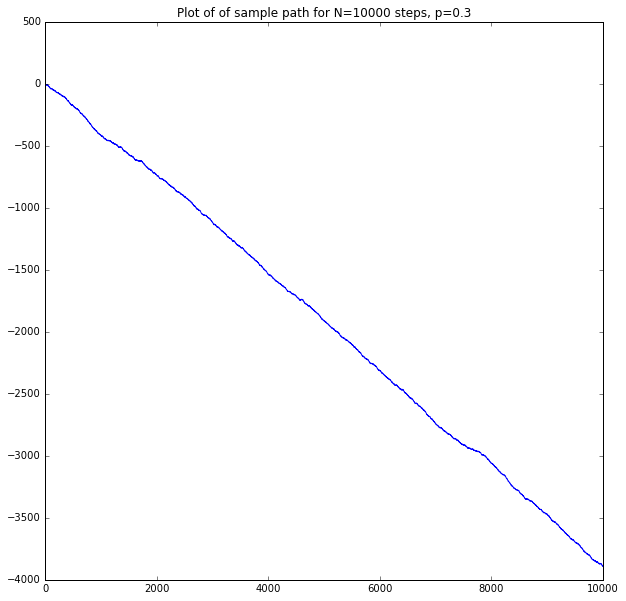

In [3]:
res = non_sym_walk(int(1e4), p=0.3)
fig=plt.figure()
fig.set_size_inches([10,10])
plt.plot(res)
plt.title('Plot of of sample path for N=10000 steps, p=0.3')
plt.show()

This random walk has tendency to go down as probability of heads is less than probability of tails, creating the tendency for a drop in the overall expected value as it is more likely for this walk to go in negative direction than it is to go in positive direction. The question suggests this random walk is not necessarily a martingale. It would be a submartingale if $E(M_{n+1}|F_n) >= M_n$ for all n >= 0

_Answer the 3 previous questions for a random walk corre-
sponding to p = 0.8_

Let outcome head = 1 and tail = -1 and n be the number of heads over a total of N steps.   
$E[X] = (1)pn + (-1)(1-p)(N-n) = (2p-1)n+(1-p)N$ where n is the number of heads out of N steps. For p=0.8, $E[X] = 0.6n + (0.2)N$ 

If the process was defined as a _martingale_, this expectation would be $N(2p-1) = (0.5)N$ where n is again the number of heads.

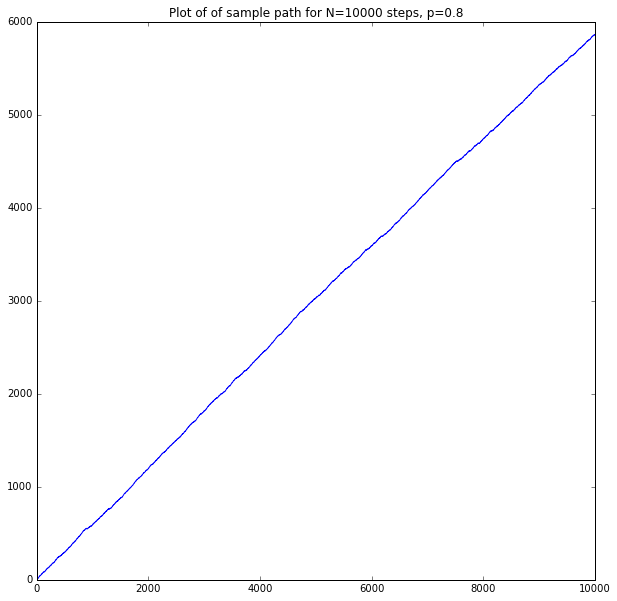

In [4]:
res = non_sym_walk(int(1e4), p=0.8)
fig=plt.figure()
fig.set_size_inches([10,10])
plt.plot(res)
plt.title('Plot of of sample path for N=10000 steps, p=0.8')
plt.show()

This random walk has tendency to go up as probability of heads is more than probability of tails, creating the tendency for a rise in the overall expected value as it is more likely for this walk to go in positive direction than it is to go in negative direction. The question suggests this random walk is not necessarily a martingale.It would be a super martingale if $E(M_{n+1}|F_n) >= M_n$ for all n <= 0

**Side note: Unlike symmetric random walk in the first question, the expected value is not about the origin. There is an obvious increase/decrease.**

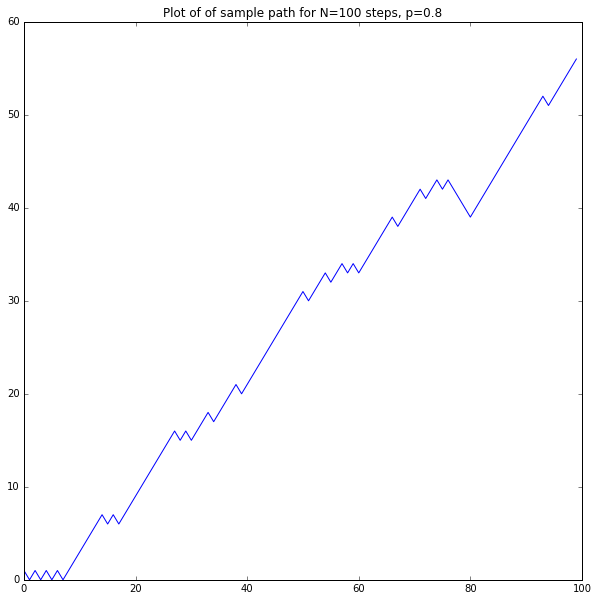

In [5]:
res = non_sym_walk(int(1e2), p=0.8)
fig=plt.figure()
fig.set_size_inches([10,10])
plt.plot(res)
plt.title('Plot of of sample path for N=100 steps, p=0.8')
plt.show()